In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from glob import glob
import ast
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps
import cv2

In [2]:
train_dir = 'dataset/'

**Let's see how the training data looks like**

In [3]:
train = pd.DataFrame()

for file in os.listdir(train_dir):
    train = train.append(pd.read_csv(train_dir + file, index_col='key_id', nrows=1))

In [4]:
train.head()

,countrycode,drawing,recognized,timestamp,word
key_id,,,,,
5152802093400064,US,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...",True,2017-03-08 21:12:07.266040,airplane
5159910851477504,US,"[[[111, 148, 161, 175, 199, 218, 231, 236, 234...",True,2017-03-21 13:02:16.246170,alarm clock
5404586804248576,US,"[[[13, 10, 12, 20, 39, 67, 170, 196, 213, 220,...",True,2017-01-24 12:58:28.487110,ambulance
5864802511486976,US,"[[[93, 103, 104, 139, 140, 149, 84], [174, 111...",False,2017-03-13 15:30:54.822430,angel
4975017072787456,HR,"[[[19, 52], [44, 50]], [[0, 0, 5], [56, 65, 69...",True,2017-03-22 11:34:53.899460,animal migration


**Let's drop the timestamp**

In [5]:
del train['timestamp']

**Let's convert the drawing to np array**

In [8]:
def draw_it(strokes):
    # PIL.Image.new() method creates a new image with the given mode and size. 
    image = Image.new("P", (256,256), color=255)
    # The ImageDraw module provides simple 2D graphics for Image objects.
    # You can use this module to create new images, annotate or retouch existing images, 
    # and to generate graphics on the fly for web use.
    image_draw = ImageDraw.Draw(image)
    
    # draw strokes on image
    for stroke in ast.literal_eval(strokes):
        for i in range(len(stroke[0])-1):
            image_draw.line([stroke[0][i], 
                             stroke[1][i],
                             stroke[0][i+1], 
                             stroke[1][i+1]],
                            fill=0, width=5)
    # resize the image
    image = image.resize((64, 64))
   
    return np.array(image)

**Create feature with np array of the drawing**

In [11]:
train['drawing_np'] = train['drawing'].apply(draw_it)

In [12]:
train.head()

,countrycode,drawing,recognized,word,drawing_np
key_id,,,,,
5152802093400064,US,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...",True,airplane,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
5159910851477504,US,"[[[111, 148, 161, 175, 199, 218, 231, 236, 234...",True,alarm clock,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
5404586804248576,US,"[[[13, 10, 12, 20, 39, 67, 170, 196, 213, 220,...",True,ambulance,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
5864802511486976,US,"[[[93, 103, 104, 139, 140, 149, 84], [174, 111...",False,angel,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4975017072787456,HR,"[[[19, 52], [44, 50]], [[0, 0, 5], [56, 65, 69...",True,animal migration,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


**Let's plot a image and see**

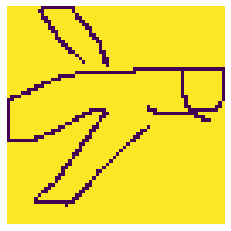

Image shape: (64, 64)


In [21]:
def plot_np_image(image_arr):
    """ Method to plot np array image """
    
    fig = plt.figure()
    ax2 = fig.add_subplot(111, frameon=False)
    ax2.imshow(image_arr)
    plt.show()
    print('Image shape: {}'.format(image_array.shape))

plot_image(train['drawing_np'].iloc[0])
